Nacteni ze souboru:


In [72]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_name):
    data = np.loadtxt(file_name, delimiter=",", dtype=bool)
    return data

def incident(maze):
    height, width = maze.shape
    incident_matrix = np.zeros((height*width, height*width))
    for i in range(height):
        for j in range(width):
            if not maze[i,j]:
                incident_row = i * width + j
                if i != height - 1 and not maze[i+1,j]:
                    incident_column = (i + 1) * width + j
                    incident_matrix[incident_row, incident_column] = 1
                    incident_matrix[incident_column, incident_row] = 1
                if j != width - 1 and not maze[i,j+1]:
                    incident_column = i * width + j + 1
                    incident_matrix[incident_row, incident_column] = 1
                    incident_matrix[incident_column, incident_row] = 1

    return incident_matrix



Najit nejkratsi cestu:

In [89]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def find_shortest_path(incident_matrix, start_node=0, end_node=None):
    if end_node is None:
        end_node = incident_matrix.shape[0] - 1
    visited = [False] * incident_matrix.shape[0]
    visited[start_node] = True
    queue = [start_node]
    list_of_paths = [[start_node]]
    while queue:
        current = queue.pop(0)
        path = list_of_paths.pop(0)
        if current == end_node:
            return path
        for i in range(incident_matrix.shape[0]):
            if not visited[i] and incident_matrix[current, i]:
                visited[i] = True
                queue.append(i)
                list_of_paths.append(path + [i])
    return None

def add_path_to_maze(maze, shortest_path):
    maze = maze.astype(int)
    for i in shortest_path:
        row = i // maze.shape[1]
        column = i % maze.shape[1]
        maze[row, column] = 2
    return maze

def plot_maze(maze):
    plt.imshow(maze, cmap=ListedColormap(['white', 'black', 'red']))
    plt.axis('off')
    plt.show()




    
    

In [81]:
def solve_maze(maze_file):
    maze = load_data(maze_file)
    incident_matrix = incident(maze)
    path = find_shortest_path(incident_matrix)
    maze = add_path_to_maze(maze, path)
    plot_maze(maze)


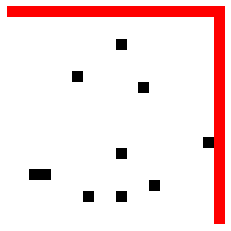

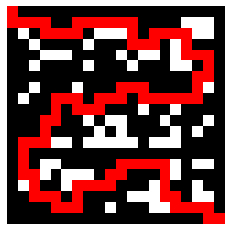

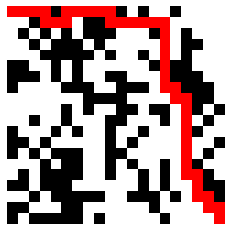

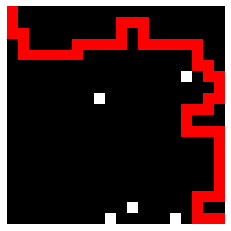

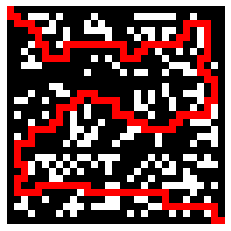

In [90]:
solve_maze("data/maze_1.csv")
solve_maze("data/maze_2.csv")
solve_maze("data/maze_3.csv")
solve_maze("data/maze_4.csv")
solve_maze("data/maze_5.csv")